# <center>**Diagnóstico de diabetes a partir de factores clínicos y hábitos**</center>


---
* Santiago Leal Casanova - 2201095
* Laura Rodriguez Cala - 2200168
* Oscar Andrés Ramírez Serna - 2200185

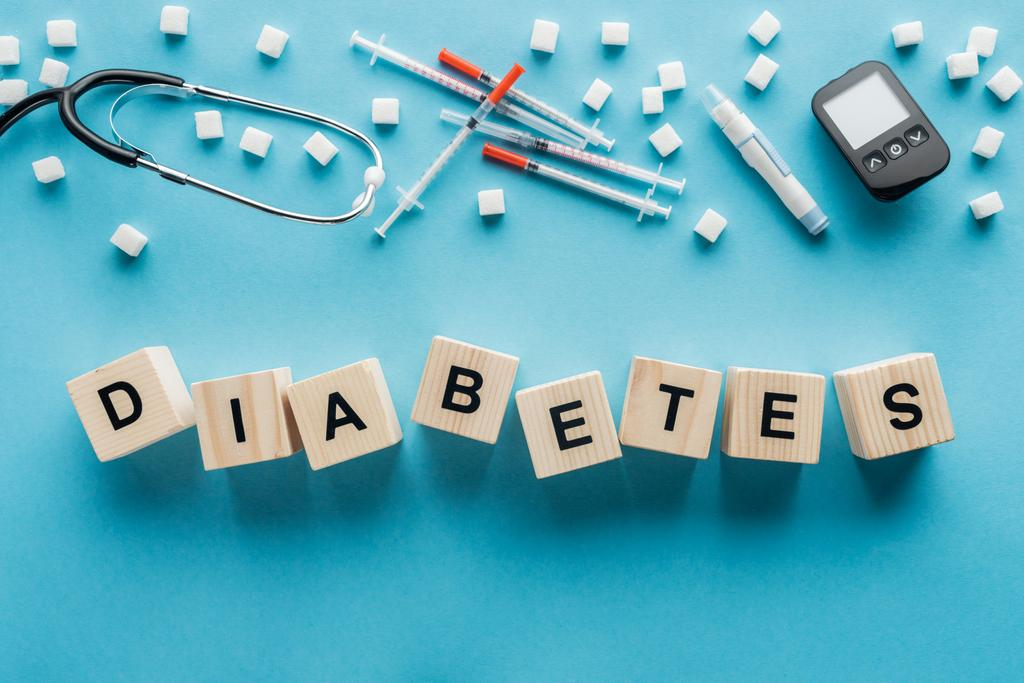

In [ ]:
#@title Imports
import os
import imageio
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import matplotlib.pyplot as plt
from IPython.display import HTML
import IPython

##Dividir datos
from sklearn.model_selection import train_test_split

##Machine learning
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Deep Learning

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#@title Cargue del dataset
!gdown https://drive.google.com/uc?id=1ULlpkhPHIr9vrNyKyznIKhNMREG1geAL

Downloading...
From: https://drive.google.com/uc?id=1ULlpkhPHIr9vrNyKyznIKhNMREG1geAL
To: /content/diabetes_health_indicators.csv
100% 6.35M/6.35M [00:00<00:00, 106MB/s]


---
## **Descripción del dataset**

---



Este dataset contiene una fracción de los datos recolectados por el CDC (Centros para el Control y Prevención de Enfermedades) mediante una encuesta telefónica denominada BRFSS, la cual es realizada en Estados Unidos anualmente para recoger respuestas sobre comportamientos de riesgo relacionados con la salud, enfermedades crónicas y el uso de servicios preventivos.

Este conjunto de datos data del año 2015 y cuenta con 70692 registros y 22 columnas que representan distintos factores médicos y hábitos, los cuales se listan a continuación:

---
## **Creación del dataframe**

---

In [ ]:
dataset = pd.read_csv('/content/diabetes_health_indicators.csv', delimiter=',')
data_rows, data_cols = dataset.shape
print(f'Hay {data_rows} filas y {data_cols} columnas')
dataset.head(-1)

Hay 70692 filas y 22 columnas


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70686,1.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,30.0,0.0,1.0,11.0,2.0,3.0
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0


---
## **Descripción de columnas**
---



 Aquí se realiza una breve *descripción* acerca del contenido de cada columna del dataset:


* **Diabetes_binary:** Determina si la persona tiene diabetes (**0** = No diabetes, **1** = Prediabetes o Diabetes)

* **HighBP:** Presión arterial alta (**0** = No alta, **1** = Alta)

* **HighChol:** Colesterol alto (**0** = No alto, **1** = Colesterol alto)

* **CholCheck:** Control de colesterol en cinco años (**0** = No control, **1** = Sí control)

* **BMI:** Índice de masa corporal

* **Smoker:** ¿Ha fumado al menos 100 cigarrillos en toda su vida? (**0** = No, **1** = Sí)

* **Stroke:** Ha sufrido un accidente cerebrovascular (**0** = No, **1** = Sí)

* **HeartDiseaseorAttack:** Enfermedad coronaria (EC) o infarto de miocardio (IM) (**0** = No, **1** = Sí)

* **PhysActivity:** Actividad física en los últimos 30 días (**0** = No, **1** = Sí)

* **Fruits:** Consume frutas (una o más por día) (**0** = No, **1** = Sí)

* **Veggies:** Consume frutas (una o más por día) (**0** = No, **1** = Sí)

* **HvyAlcoholConsump:** Para hombres adultos, consumo de alcohol ≥  14 bebidas por semana. Para mujeres adultas, consumo de acohol ≥ 7 bebidas por semana. (**0** = No, **1** = Sí)

* **AnyHealthcare:** Tiene un plan de servicio de salud. (**0** = No, **1** = Sí)

* **NoDocbcCost:** En los pasados 12 meses no pudo asistir a una consulta médica debido al costo? (**0** = No, **1** = Sí)

* **GenHlth:** Cómo califica su condición de salud en general? (**1** = Excelente, **2** = Muy buena, **3** = Buena, **4** = Aceptable, **5** = Pobre)

* **MentHlth:** Número de días con salud mental inestable (1 - 30)

* **PhysHlth:** Número de días con una lesión o enfermedad física en los 30 días recientes (1 - 30)

* **DiffWalk:** Dificultad para caminar o subir escaleras (**0** = No, **1** = Sí)

* **Sex:** (**0** = Femenino, **1** = Masculino)

* **Age:** Intervalo de edad al que pertenece (**1** = 18-24, **2** = 25-29, **3** = 30-34, **4** = 35-39, **5** = 40-44, **6** = 45-19, **7** = 50-54, **8** = 55-59, **9** = 60-64, **10** = 65-69, **11** = 70-74, **12** = 75-79, **13** = Mayor de 80)

* **Education:** (**1** = Never attended, **2** = Elementary, **3** = Some High school, **4** = High school graduate, **5** = Some college or technichal school, **6** = College graduate)

* **Income:** (**1** = Menos de 10.000, **2** = Entre 10.000 y 15.000, **3** = Entre 15.000 y 20.000, **4** = Entre 20.000 y 25.000, **5** = Entre 25.000 y 35.000, **6** = Entre 35.000 y 50.000, **7** = Entre 50.000 y 75.000, **8** = Más de 75.000)

In [ ]:
#@title Listado de columnas
for col in dataset.columns:
    print(col)

Diabetes_binary
HighBP
HighChol
CholCheck
BMI
Smoker
Stroke
HeartDiseaseorAttack
PhysActivity
Fruits
Veggies
HvyAlcoholConsump
AnyHealthcare
NoDocbcCost
GenHlth
MentHlth
PhysHlth
DiffWalk
Sex
Age
Education
Income


In [ ]:
# Verificar que no hayan valores nulos
for col in dataset.columns:
    print (col, np.sum(pd.isnull(dataset[col])))

Diabetes_binary 0
HighBP 0
HighChol 0
CholCheck 0
BMI 0
Smoker 0
Stroke 0
HeartDiseaseorAttack 0
PhysActivity 0
Fruits 0
Veggies 0
HvyAlcoholConsump 0
AnyHealthcare 0
NoDocbcCost 0
GenHlth 0
MentHlth 0
PhysHlth 0
DiffWalk 0
Sex 0
Age 0
Education 0
Income 0


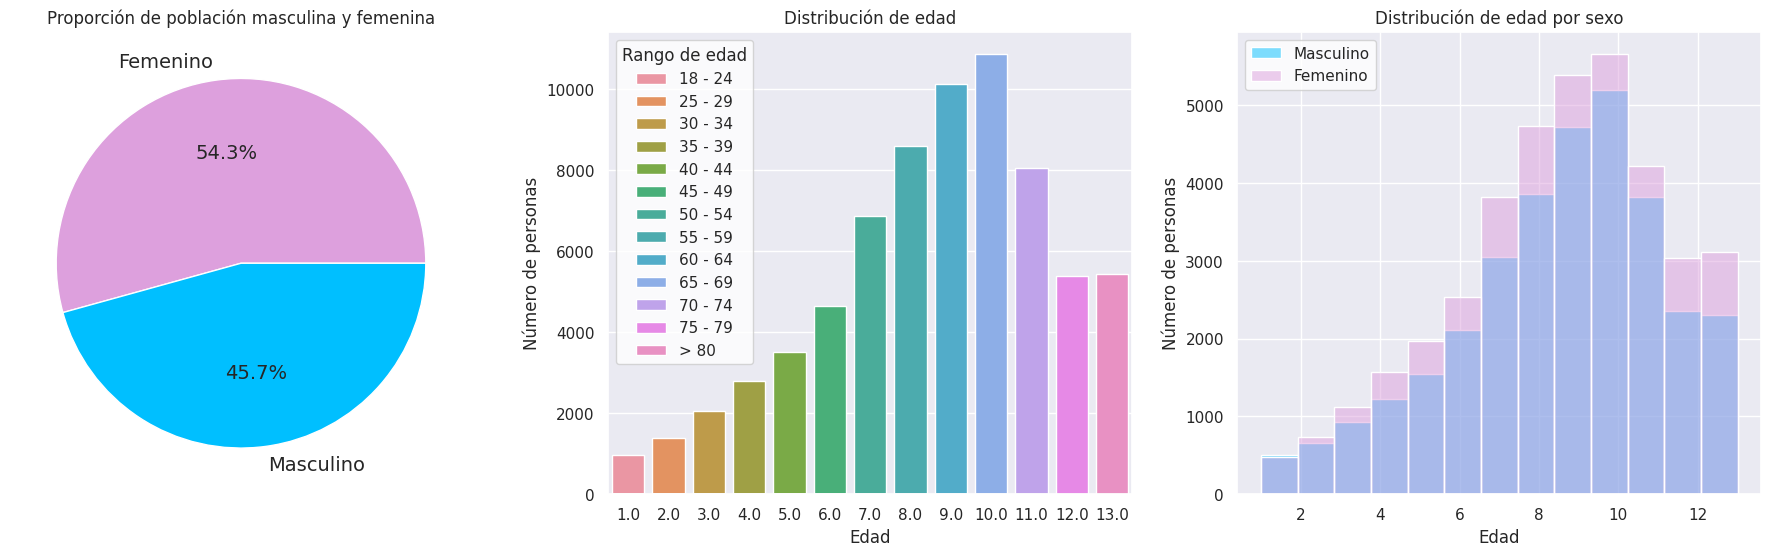

In [ ]:
#@title **Distribución de la población por edad y sexo**
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(23, 6))

total = dataset['Sex'].value_counts()
sns.set_style("whitegrid")
axes[0].pie(total, labels=['Femenino', 'Masculino'], autopct='%1.1f%%', colors=['plum', 'deepskyblue'], textprops={'fontsize': 14})
axes[0].set_title('Proporción de población masculina y femenina')

edad_hist = sns.countplot(x = dataset["Age"], hue = dataset["Age"], ax=axes[1], dodge = False)
edad_hist.set(xlabel = "Edad", ylabel="Número de personas")
axes[1].legend(title='Rango de edad', labels =["18 - 24", "25 - 29", "30 - 34", "35 - 39", "40 - 44", "45 - 49", "50 - 54", "55 - 59", "60 - 64", "65 - 69", "70 - 74", "75 - 79", "> 80"])
axes[1].set_title('Distribución de edad')

male_age = dataset[dataset['Sex'] == 1.0]
female_age = dataset[dataset['Sex'] == 0.0]

sns.histplot(male_age['Age'], bins=13, color='deepskyblue', alpha=0.5, label='Masculino', ax=axes[2])
sns.histplot(female_age['Age'], bins=13, color='plum', alpha=0.5, label='Femenino', ax=axes[2])
axes[2].set_title('Distribución de edad por sexo')
axes[2].set_xlabel('Edad')
axes[2].set_ylabel('Número de personas')
axes[2].legend()

Text(0.5, 1.0, 'Proporción de personas con diabetes que realizan o no actividad física')

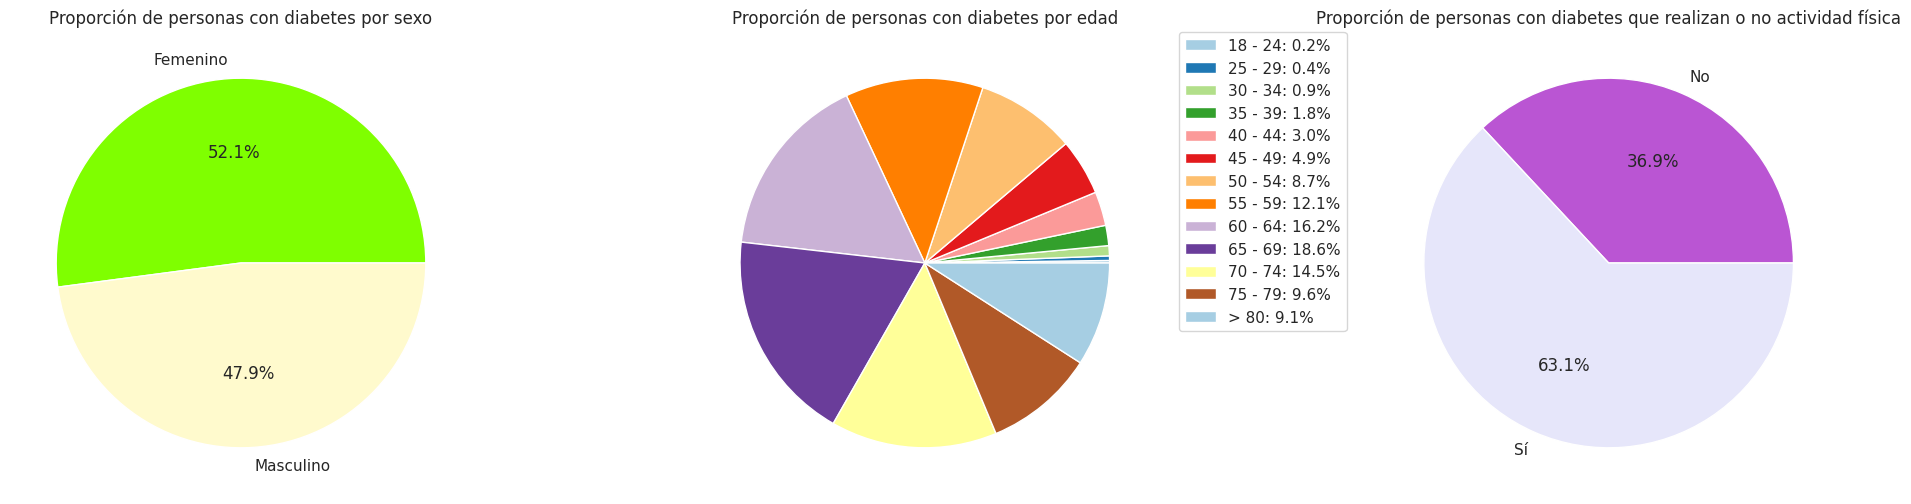

In [ ]:
#@title **Distribución de la población con diabetes**
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

diabetes_df = dataset[dataset['Diabetes_binary'] == 1.0]
diabetes_counts = dataset.groupby('Sex')['Diabetes_binary'].sum()

axes[0].pie(diabetes_counts, labels=["Femenino", "Masculino"], autopct='%1.1f%%', colors = ['chartreuse', 'lemonchiffon'])
axes[0].set_title('Proporción de personas con diabetes por sexo')

age_counts = diabetes_df.groupby('Age').size()
sns.set_palette('Paired')

age_percents = 100 * age_counts / age_counts.sum()

pie = axes[1].pie(age_counts)
axes[1].set_title('Proporción de personas con diabetes por edad')

labels = [f'{age}: {percent:.1f}%' for age, percent in zip(["18 - 24", "25 - 29", "30 - 34", "35 - 39", "40 - 44", "45 - 49", "50 - 54", "55 - 59", "60 - 64", "65 - 69", "70 - 74", "75 - 79", "> 80"], age_percents)]
axes[1].legend(pie[0], labels,  bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

physical_act_counts = diabetes_df.groupby('PhysActivity').size()
plt.pie(physical_act_counts, labels=["No", "Sí"], autopct='%1.1f%%', colors = ['mediumorchid', 'lavender'])
plt.title('Proporción de personas con diabetes que realizan o no actividad física')

<Axes: >

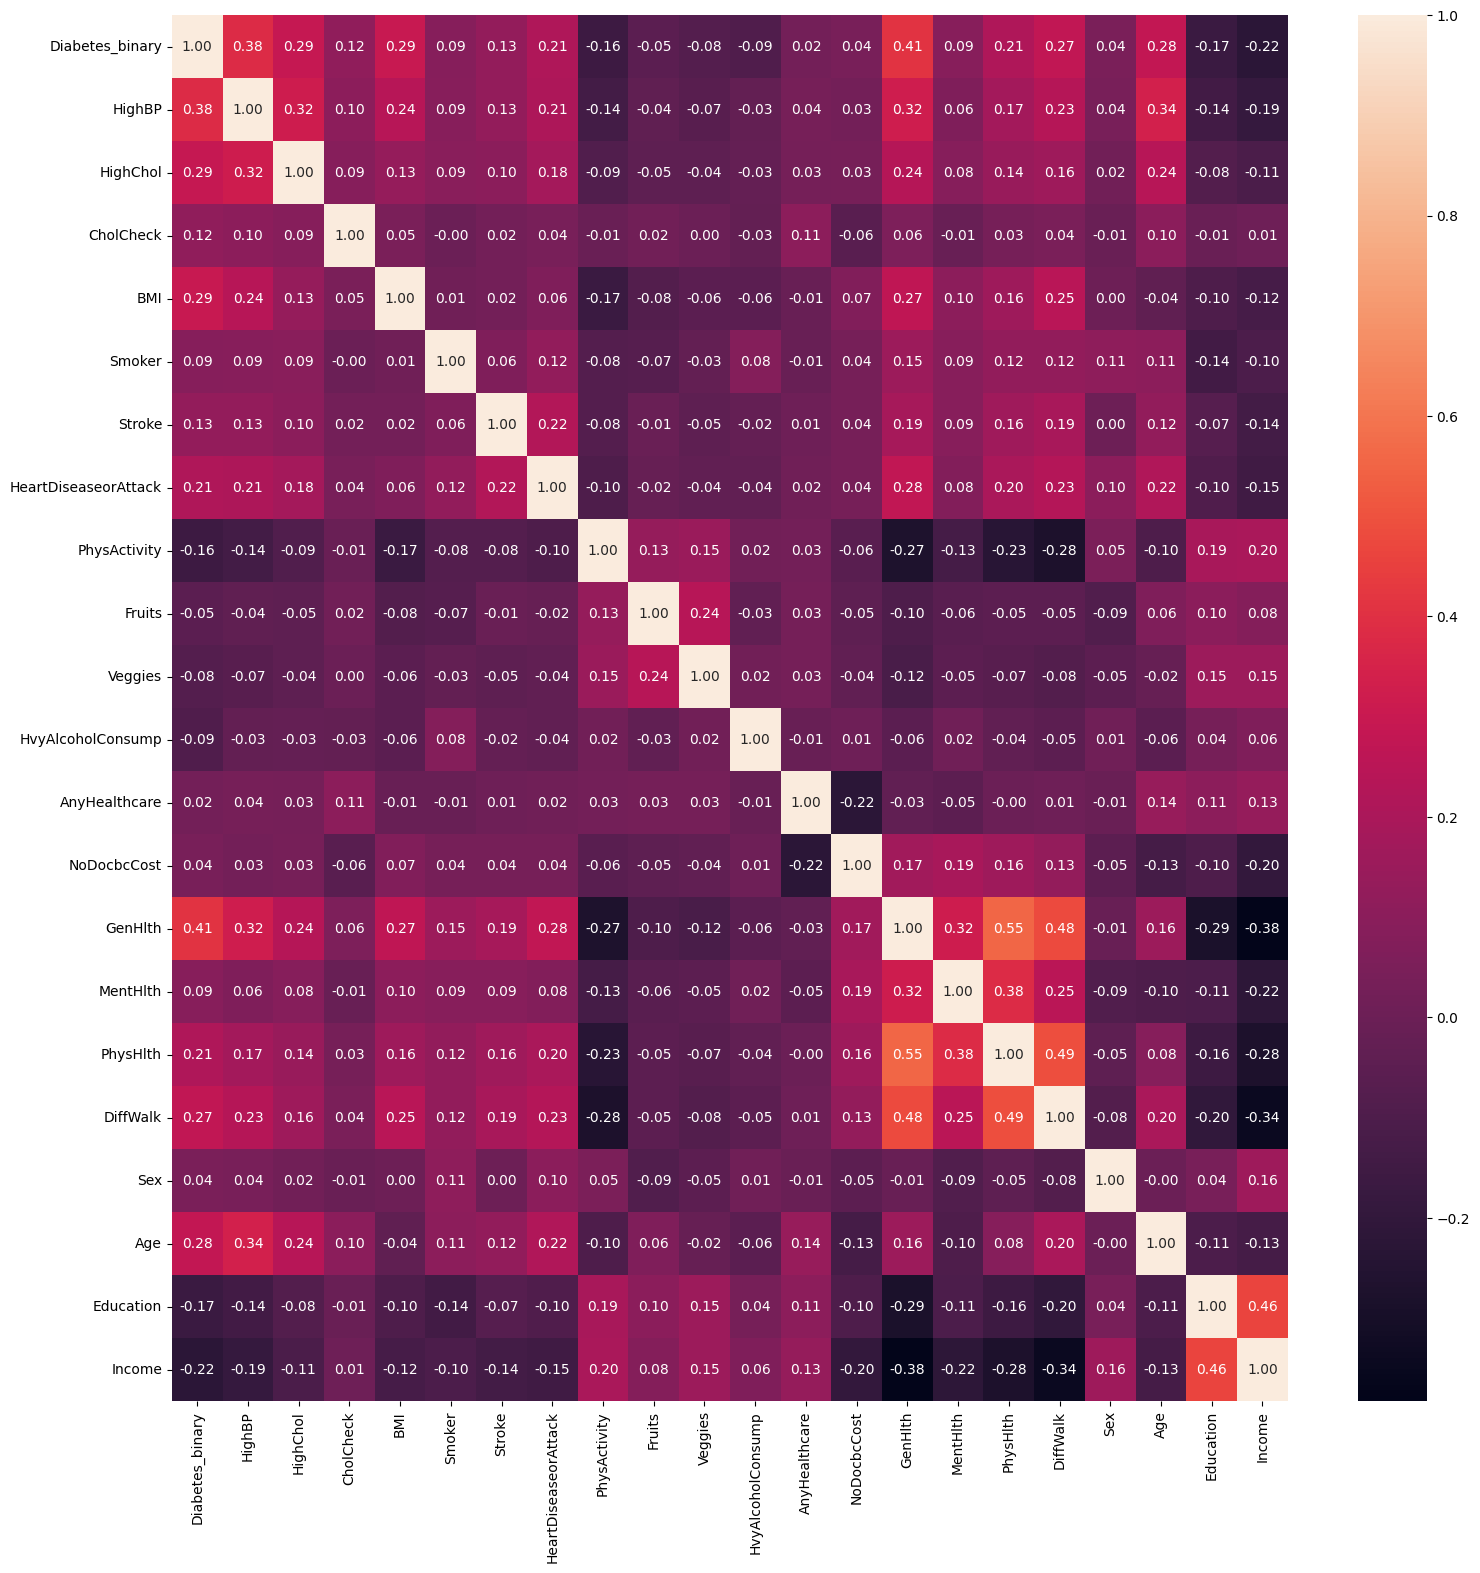

In [ ]:
#@title **Matriz de correlación**
plt.subplots(figsize=(18,18))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

---
## **División de los datos (Entrenamiento y Test)**

---

Para el desarrollo del proyecto, en cada uno de los métodos empleados se utilizó el *80%* de los datos para *entrenamiento* y el *20%* para *test*

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.values[:,1:] #A partir de la segunda columna del dataset
y = dataset.values[:,0] ##El ground Truth se encuentra en la primera columna del data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


---
## **Machine Learning**

---

A continuación se presenta la implementación de algunos modelos de machine learning, realizando ajuste de parametros así como también comparando métodos de entrenamientos(como por ejemplo crossvalidation), para así probar el rendimiento del modelo bajo diferenes circunstancias. Los modelos a usar son los siguientes:


*   Gaussian Naive Bayes
*   Desicion tree
*   Random Forest
*   SupportVector machine

---
---


## Gaussian Naive Bayes

---

In [ ]:
est = GaussianNB()
est.fit(X_train,y_train)


print('Accuracy:  %.3f' %(accuracy_score(est.predict(X_test), y_test)))

Accuracy:  0.717


***Matriz de confusión***

In [ ]:
y_true = y_test
y_pred = est.predict(X_test)
cm_test = confusion_matrix(y_true, y_pred)
print("Matriz de confusión \n",cm_test)
print("Número total de pacientes por fila (No diabetes - Diabetes)")
print(np.sum(cm_test, axis=1))


Matriz de confusión 
 [[5117 1940]
 [2067 5015]]
Número total de pacientes por fila (No diabetes - Diabetes)
[7057 7082]


---
***Cross Validation***

In [ ]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ('Values:', s)
print ("Accuracy: %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

Values: [0.71697313 0.72588402 0.71127458 0.72400622 0.71749894 0.71466968
 0.71325506 0.72556231 0.7187721  0.72542085]
Accuracy: 0.719 (+/- 0.00523)


---
---

## Decision Tree
---

Se van a emplear las tres opciones de Criterion (“gini”, “entropy”, “log_loss”)

In [ ]:
est = DecisionTreeClassifier()
est.fit(X_train,y_train)
print('Accuracy: %.3f' %(accuracy_score(est.predict(X_test), y_test)))

Accuracy: 0.657


**Matriz de confusión**

In [ ]:
y_true = y_test
y_pred = est.predict(X_test)
cm_test = confusion_matrix(y_true, y_pred)
print("Matriz de confusión \n",cm_test)
print("Número total de pacientes por fila (No diabetes - Diabetes)")
print(np.sum(cm_test, axis=1))

Matriz de confusión 
 [[4669 2388]
 [2461 4621]]
Número total de pacientes por fila (No diabetes - Diabetes)
[7057 7082]


---
***Cross Validation***

In [ ]:
est = DecisionTreeClassifier()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("Accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


Accuracy 0.656 (+/- 0.00498)


----

***Tunning de parametros variando criterion y max-depth***

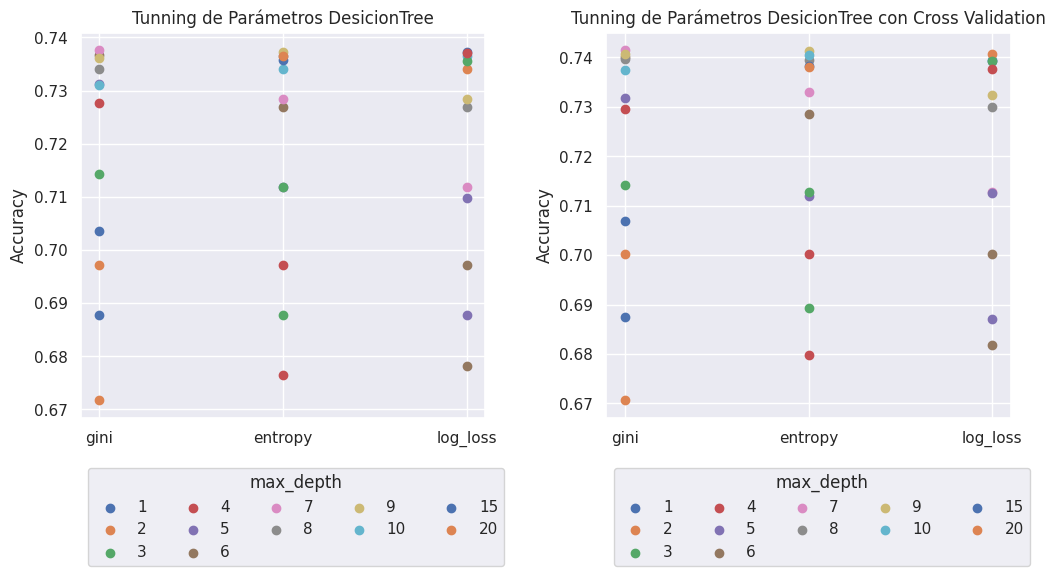

Mejor accuracy: 0.738 con criterion: gini y max_depth:  7
Mejor accuracy con Cross Validation: 0.741 (+/- 0.00702) con criterion: gini y max_depth: 7


In [ ]:
best_1 = 0
l_criterion=['gini', 'entropy', 'log_loss']
l_max_depth=[1,2,3,4,5,6,7,8,9,10,15,20]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in l_criterion:
    for j in l_max_depth:
        est = DecisionTreeClassifier(criterion=i, max_depth=j)
        est.fit(X_train, y_train)
        accuracy_1 = accuracy_score(est.predict(X_test), y_test)
        plt.scatter(i, accuracy_1, label=j)

        if accuracy_1 > best_1:
            best_1 = accuracy_1
            best_c1 = i
            best_m1 = j

plt.legend(l_max_depth, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.ylabel('Accuracy')
plt.title('Tunning de Parámetros DesicionTree')


best_2 = 0
plt.subplot(1, 2, 2)
for i in l_criterion:
    for j in l_max_depth:
        est = DecisionTreeClassifier(criterion=i, max_depth=j)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        accuracy_2 = np.mean(s)
        plt.scatter(i, np.mean(s), label=j)

        if accuracy_2 > best_2:
            best_2 = accuracy_2
            best_c2 = i
            best_m2 = j

plt.legend(l_max_depth, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.ylabel('Accuracy')
plt.title('Tunning de Parámetros DesicionTree con Cross Validation')

plt.subplots_adjust(wspace=0.3)

plt.show()

print('Mejor accuracy: %.3f' %(best_1), 'con criterion:', best_c1, 'y max_depth: ', best_m1)
print('Mejor accuracy con Cross Validation: %.3f' %(best_2),  '(+/- %.5f)' %(np.std(s)), 'con criterion:'  ,best_c2, 'y max_depth:', best_m2)

---
---

## Random Forest

---

***Utilizando parámetros por defecto***

In [ ]:
#Random Forest Classifier
est_rf = RandomForestClassifier()
est_rf.fit(X_train,y_train)
print("Accuracy con Random Forest: %.3f" %(accuracy_score(est_rf.predict(X_test), y_test)))

Accuracy con Random Forest: 0.732


***Matriz de confusión***

In [ ]:
y_true = y_test
y_pred = est_rf.predict(X_test)
cm_test = confusion_matrix(y_true, y_pred)
print("Matriz de confusión \n",cm_test)
print("Número total de pacientes por fila (No diabetes - Diabetes)")
print(np.sum(cm_test, axis=1))

Matriz de confusión 
 [[4885 2172]
 [1613 5469]]
Número total de pacientes por fila (No diabetes - Diabetes)
[7057 7082]


---
***Cross Validation***

In [ ]:
est = RandomForestClassifier()

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("Accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


Accuracy 0.737 (+/- 0.00590)


----

***Tunning de parametros variando criterion y max-depth***

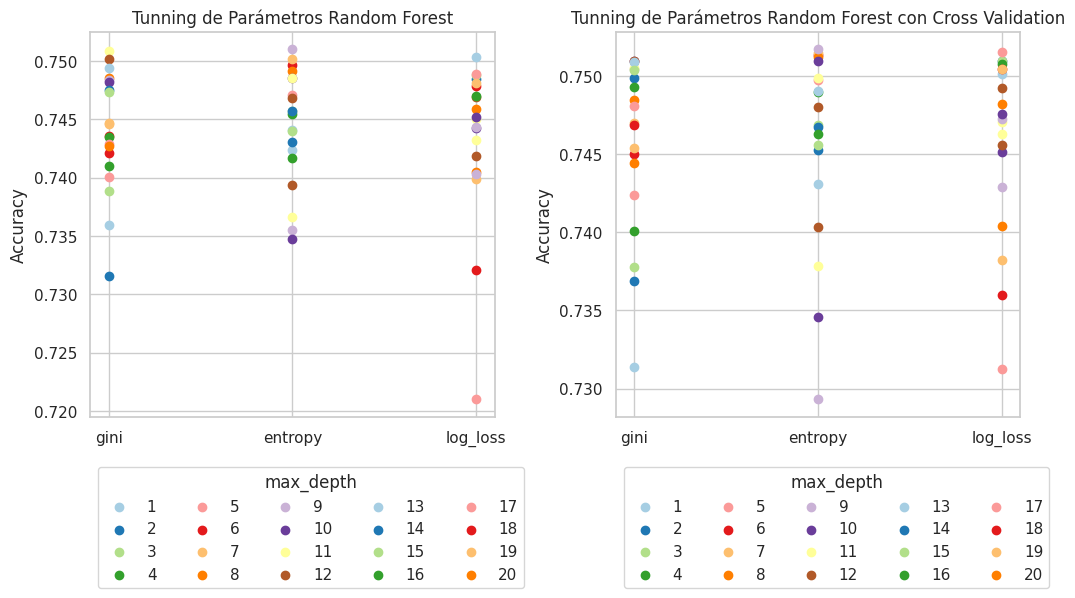

Mejor accuracy: 0.751 con criterion: entropy y max_depth:  13
Mejor accuracy con Cross Validation: 0.752 (+/- 0.00448) con criterion: entropy y max_depth: 13


In [ ]:
##Variando Criterion y max_depth
best_1 = 0
l = ['gini', 'entropy', 'log_loss']
m = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in l:
    for j in m:
        est = RandomForestClassifier(criterion=i, max_depth=j)
        est.fit(X_train, y_train)
        accuracy_1 = accuracy_score(est.predict(X_test), y_test)
        plt.scatter(i, accuracy_1, label=j)

        if accuracy_1 > best_1:
            best_1 = accuracy_1
            best_c1 = i
            best_m1 = j

plt.legend(m, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.ylabel('Accuracy')
plt.title('Tunning de Parámetros Random Forest')


best_2 = 0
plt.subplot(1, 2, 2)
for i in l:
    for j in m:
        est = RandomForestClassifier(criterion=i, max_depth=j)
        s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
        accuracy_2 = np.mean(s)
        plt.scatter(i, np.mean(s), label=j)

        if accuracy_2 > best_2:
            best_2 = accuracy_2
            best_c2 = i
            best_m2 = j

plt.legend(m, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='max_depth')
plt.ylabel('Accuracy')
plt.title('Tunning de Parámetros Random Forest con Cross Validation')

plt.subplots_adjust(wspace=0.3)

plt.show()

print('Mejor accuracy: %.3f' %(best_1), 'con criterion:', best_c1, 'y max_depth: ', best_m1)
print('Mejor accuracy con Cross Validation: %.3f' %(best_2),  '(+/- %.5f)' %(np.std(s)), 'con criterion:'  ,best_c2, 'y max_depth:', best_m2)


-----
-----


## Support vector machine (SVM)

----

***Utilizando parámetros por defecto***

In [ ]:
#SVM
est = SVC()
est.fit(X_train,y_train)
print("Accuracy con SVM: %.3f" %(accuracy_score(est.predict(X_test), y_test)))

Accuracy con SVM: 0.745


***Matriz de confusión***

In [ ]:
y_true = y_test
y_pred = est.predict(X_test)
cm_test = confusion_matrix(y_true, y_pred)
print("Matriz de confusión \n",cm_test)
print("Número total de pacientes por fila (No diabetes - Diabetes)")
print(np.sum(cm_test, axis=1))

Matriz de confusión 
 [[5157 1900]
 [1686 5396]]
Número total de pacientes por fila (No diabetes - Diabetes)
[7057 7082]


----
***Tunning de parametros variando el kernel***

Mejor accuracy:  0.7463752740646439 con kernel: poly


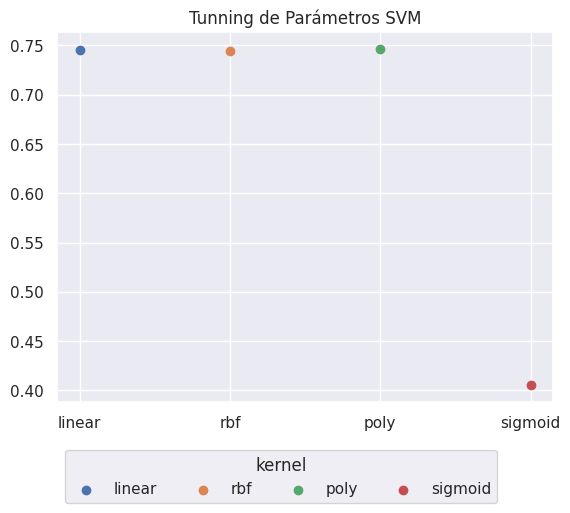

In [ ]:
#Variando el kernel
best=0
k=['linear', 'rbf', 'poly', 'sigmoid']
for i in k:
  est = SVC(kernel=i)
  est.fit(X_train,y_train)
  accuracy=accuracy_score(est.predict(X_test), y_test)
  plt.scatter(i, accuracy, label='Predictions')
  if accuracy > best:
    best=accuracy
    best_c=i

plt.legend(k, loc='upper left', bbox_to_anchor=(0, -0.11), ncol=5, title='kernel')
plt.title('Tunning de Parámetros SVM')
print('Mejor accuracy: %.3f', %(best), 'con kernel:', best_c)

---
## **Deep Learning**

---

<function relu at 0x7f23e76c2680>
Epoch 1/10
1768/1768 [==============================] - 5s 2ms/step - loss: 0.5816 - accuracy: 0.6906
Epoch 2/10
1768/1768 [==============================] - 5s 3ms/step - loss: 0.5451 - accuracy: 0.7209
Epoch 3/10
1768/1768 [==============================] - 4s 2ms/step - loss: 0.5358 - accuracy: 0.7283
Epoch 4/10
1768/1768 [==============================] - 4s 2ms/step - loss: 0.5309 - accuracy: 0.7332
Epoch 5/10
1768/1768 [==============================] - 5s 3ms/step - loss: 0.5261 - accuracy: 0.7362
Epoch 6/10
1768/1768 [==============================] - 4s 2ms/step - loss: 0.5242 - accuracy: 0.7372
Epoch 7/10
1768/1768 [==============================] - 4s 2ms/step - loss: 0.5225 - accuracy: 0.7383
Epoch 8/10
1768/1768 [==============================] - 5s 3ms/step - loss: 0.5208 - accuracy: 0.7416
Epoch 9/10
1768/1768 [==============================] - 4s 2ms/step - loss: 0.5200 - accuracy: 0.7407
Epoch 10/10
442/442 [===========================

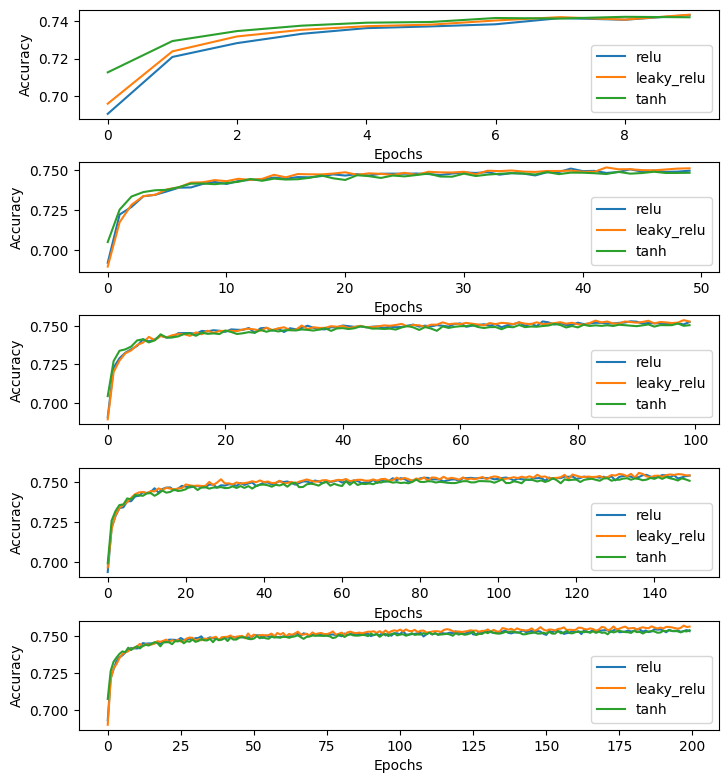

In [ ]:
df = pd.DataFrame()
df = df.assign(Funcion_activacion=None, Epoch=None, Accuracy=None)
activation_function = [tf.nn.relu, tf.nn.leaky_relu, tf.nn.tanh]
activation_function_n = ['relu', 'leaky_relu', 'tanh']
num_epoch = [10,50, 100, 150, 200]
for j,l in zip(num_epoch,range(len(num_epoch))):
   for i,m in zip(activation_function,activation_function_n):
    print(i)
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=X_train[0].shape),
    tf.keras.layers.Dense(128, activation=i),
    tf.keras.layers.Dense(64, activation=i),
    tf.keras.layers.Dense(32, activation=i),
    tf.keras.layers.Dense(16, activation=i),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

    model.compile(optimizer=tf.keras.optimizers.SGD(),
            loss='binary_crossentropy',
            metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=j)
    test_loss, test_acc = model.evaluate(X_test, y_test)


    nueva_fila = { 'Funcion_activacion': m, 'Epoch': j,'Accuracy': test_acc}
    df = df.append(nueva_fila, ignore_index=True)

    if l==0:
      plt.subplot(5, 1, 1)
      plt.plot(history.history['accuracy'], label=m)
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.legend()
      print('Test accuracy:', test_acc)

      plt.subplots_adjust(left=0.2,
                    bottom=0.5,
                    right=1.2,
                    top=2.0,
                    wspace=0.5,
                    hspace=0.4)

    elif l==1:
      plt.subplot(5, 1, 2)
      plt.plot(history.history['accuracy'], label=m)
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.legend()
      print('Test accuracy:', test_acc)

      plt.subplots_adjust(left=0.2,
                    bottom=0.5,
                    right=1.2,
                    top=2.0,
                    wspace=0.5,
                    hspace=0.4)


    elif l==2:
      plt.subplot(5, 1, 3)
      plt.plot(history.history['accuracy'], label=m)
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.legend()
      print('Test accuracy:', test_acc)
      plt.subplots_adjust(left=0.2,
                    bottom=0.5,
                    right=1.2,
                    top=2.0,
                    wspace=0.5,
                    hspace=0.4)

    elif l==3:
      plt.subplot(5, 1, 4)
      plt.plot(history.history['accuracy'], label=m)
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.legend()
      print('Test accuracy:', test_acc)
      plt.subplots_adjust(left=0.2,
                    bottom=0.5,
                    right=1.2,
                    top=2.0,
                    wspace=0.5,
                    hspace=0.4)


    elif l==4:
      plt.subplot(5, 1, 5)
      plt.plot(history.history['accuracy'], label=m)
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.legend()
      print('Test accuracy:', test_acc)
      plt.subplots_adjust(left=0.2,
                    bottom=0.5,
                    right=1.2,
                    top=2.0,
                    wspace=0.5,
                    hspace=0.4)

In [ ]:
df.head(16)

,Funcion_activacion,Epoch,Accuracy
0,relu,10,0.733291
1,leaky_relu,10,0.748709
2,tanh,10,0.735625
3,relu,50,0.746800
4,leaky_relu,50,0.741495
5,tanh,50,0.739020
6,relu,100,0.743122
7,leaky_relu,100,0.747083
8,tanh,100,0.746234
9,relu,150,0.750265


---
## **Comparación Métodos empleados**

---

,Método,Accuracy
0,Gaussian Naive Bayes,0.7170
1,Gaussian Naive Bayes (Cross Validation),0.7190
2,Decision Tree,0.7238
3,Decision Tree (Cross Validation),0.7410
4,Random Forest,0.7510
5,Random Forest(Cross Validation),0.7520
6,Support vector machine (SVM),0.7460
7,Deep Learning,0.7535


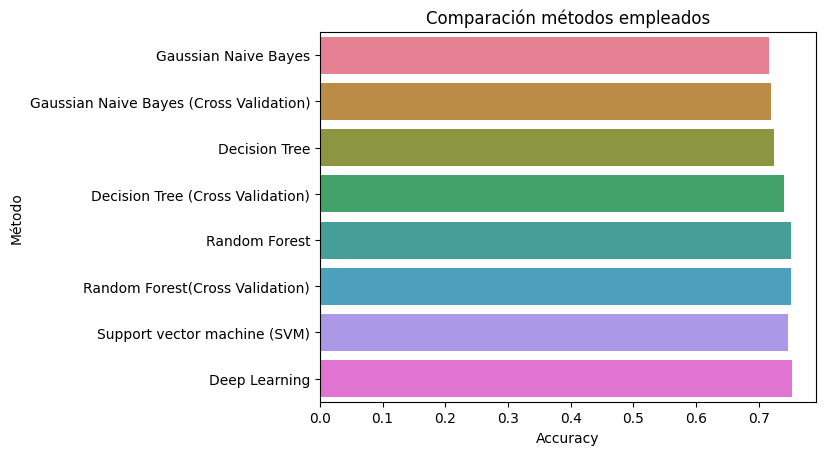

In [ ]:
df_accuracy = pd.DataFrame()

metodos = ['Gaussian Naive Bayes', 'Gaussian Naive Bayes (Cross Validation)', 'Decision Tree', 'Decision Tree (Cross Validation)', 'Random Forest', 'Random Forest(Cross Validation)' ,'Support vector machine (SVM)', 'Deep Learning']
accuracy = [0.717, 0.719, 0.7238, 0.741, 0.751, 0.752, 0.746, 0.7535 ]


df_accuracy['Método'] = metodos
df_accuracy['Accuracy'] = accuracy

with sns.color_palette("husl", 8):
  c_hist = sns.barplot(data= df_accuracy, y = "Método", x="Accuracy", orient = 'h', dodge = False)
  c_hist.set(xlabel ="Accuracy", ylabel="Método")
  c_hist.set_title('Comparación métodos empleados')




df_accuracy.head(8)